In [ ]:
#Question2 on Stochastic gradient descent

#Part A : Data sampling

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# this is how data can be generated
mean =10
std = 1
data_sample = np.random.normal(mean,std,1000)
print(data_sample)
count, bins, ignored = plt.hist(data_sample, 50, normed=True) 
print(count)
print(bins)
print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 

In [76]:
# Data generated here

# million data points normally distributed
data_size = int(1e6)
x1_list = np.random.normal(3,np.sqrt(4),data_size)
x2_list = np.random.normal(-1,np.sqrt(4),data_size)
noise_list = np.random.normal(0,np.sqrt(2),data_size)


# x1_list = sorted(x1_list,key=float)
# pdf1 = stats.norm.pdf(x1_list,3,2)
# x2_list = sorted(x2_list,key=float)
# pdf2 = stats.norm.pdf(x2_list,-1,2)
# noise_list = sorted(noise_list,key=float)
# pdf3 = stats.norm.pdf(noise_list,0,np.sqrt(2))


# plt.plot(x1_list,pdf1)
# plt.plot(x2_list,pdf2)
# plt.plot(noise_list,pdf3)



[[-0.62324854]
 [ 4.73572159]
 [ 1.09200893]
 [ 6.22454544]
 [ 6.81606075]
 [ 4.39982253]
 [ 1.24803291]
 [ 4.50595067]
 [ 4.41934529]
 [ 3.49732497]]


c:\users\chinmay\appdata\local\programs\python\python35-32\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


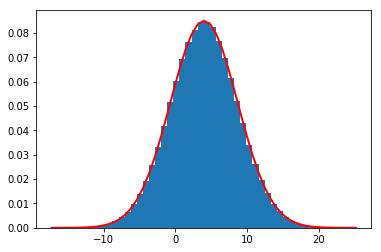

In [102]:
# given theta_vector and x1 and x2 vectors , lets try to see the distribution of yi with error vector 

# 3x1
theta = np.array([[ 3,1,2 ]])
theta = theta.T

# mx1
epsilon = np.array([noise_list])
epsilon = epsilon.T           

# method to add rows in matrix
#theta = np.vstack((theta,np.array([[4]])))
#theta.shape


# mx3
x_vector = np.array([[ 1,x1_list[0], x2_list[0] ]])

# takes a lot of time to append for million data points
#--------------------------------------
# for i in range(len(x1_list)-1):
#     new_sample = np.array([[ 1 , x1_list[i+1], x2_list[i+1]    ]])
#     x_vector = np.vstack( ( x_vector , new_sample ) )

# print(x_vector.shape)    

# y_vector = np.matmul(x_vector,theta) + epsilon
#-----------------------------------------------------



# approach 2, still takes time but lesser
# y_list =[]
# for i in range(len(x1_list)):
#     y_list.append(  theta[0][0]*1 + theta[1][0]*x1_list[i] + theta[2][0]*x2_list[i] + epsilon[i][0]   )

# y_vector = np.array([y_list])
# y_vector = y_vector.T
#--------------------------------------------------------------------


#Approach3 : column appending

x_vector = np.ones((int(1e6),1))

x1_vector = np.array([x1_list])
x1_vector = x1_vector.T

x2_vector = np.array([x2_list])
x2_vector = x2_vector.T

x_vector = np.append( x_vector, x1_vector,axis = 1 )

x_vector = np.append( x_vector, x2_vector,axis = 1 )
y_vector = np.matmul(x_vector,theta) + epsilon




print(y_vector[:10])


mean = np.mean(y_vector)
std = np.std(y_vector)

count, bins, ignored = plt.hist(y_vector, 50, normed=True) 
# print(count)
# print(bins)
# print(ignored)
plt.plot(bins, 1/(std * np.sqrt(2 * np.pi)) *
          np.exp( - (bins - mean)**2 / (2 * std**2) ), 
          linewidth=2, color='r') 
plt.show() 
# it also seems to follow normal distribution with mean (theta.T*X)


3